## Hypothesis Testing 

To understand hypothesis testing, selected House sales in King county dataset from Kaggle.The dataset consists of 21614 rows and 21 columns which means it includes the data of 21614 houses sold with respect to 21 variables that includes bedrooms,bathrooms, squarefeet, grade, year built, year rennovated, floors, waterfront, condition and various other factors too.

#### Objective:  
1. To interpret the attributes that are responsible for deciding the price of a house in King county
2. To understand hypothesis testing 

In [2]:
#Read the csv file
setwd("/Users/Thiya/Desktop/Wayne/Winter 2018/Statistical methods")
House= read.csv(file = "House_data.csv", header = T, sep = ',')

In [3]:
#Correlation of the variables excluding date,id and zipcode
House_cor <- cor(House[,c(3:16,18:21)])
print(House_cor)

                   price     bedrooms   bathrooms sqft_living     sqft_lot
price         1.00000000  0.308349598  0.52513751  0.70203505  0.089660861
bedrooms      0.30834960  1.000000000  0.51588364  0.57667069  0.031703243
bathrooms     0.52513751  0.515883638  1.00000000  0.75466528  0.087739662
sqft_living   0.70203505  0.576670693  0.75466528  1.00000000  0.172825661
sqft_lot      0.08966086  0.031703243  0.08773966  0.17282566  1.000000000
floors        0.25679389  0.175428935  0.50065317  0.35394929 -0.005200991
waterfront    0.26636943 -0.006582479  0.06374363  0.10381782  0.021603683
view          0.39729349  0.079531852  0.18773702  0.28461119  0.074710106
condition     0.03636179  0.028472104 -0.12498193 -0.05875259 -0.008958250
grade         0.66743426  0.356966725  0.66498253  0.76270448  0.113621124
sqft_above    0.60556730  0.477600161  0.68534248  0.87659660  0.183512281
sqft_basement 0.32381602  0.303093375  0.28377003  0.43504297  0.015286202
yr_built      0.05401153 

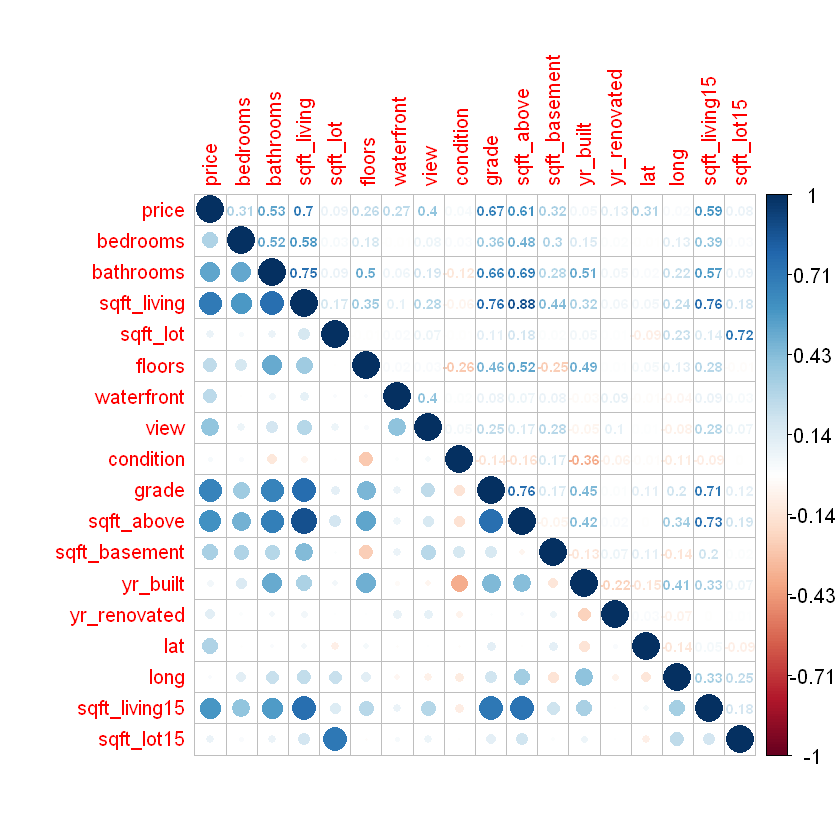

In [64]:
#Correlation plot
corrplot::corrplot.mixed(House_cor,lower = "circle", upper = "number", tl.pos = "lt",diag = "l",tl.cex = 1, cl.cex = 1, cl.length = 8, number.cex = 0.7)

Positively-correlated variables:
1. Price and bathrooms - 0.53
2. Price and sqft_living - 0.70
3. Price and grade - 0.67
4. Price and sqft_above -0.61
5. Bedrooms and bathrooms - 0.52
6. Bedrooms and sqft_living - 0.58
7. Bathrooms and sqft_living - 0.75
8. Bathrooms and sqft_above- 0.69
9. Bathrooms and grade- 0.66
10. Sqft_living and grade -0.76
11. Sqft_living and Sqft_above -0.88

Negatively-correlated variables:
There is no strong negative correlation between the variables

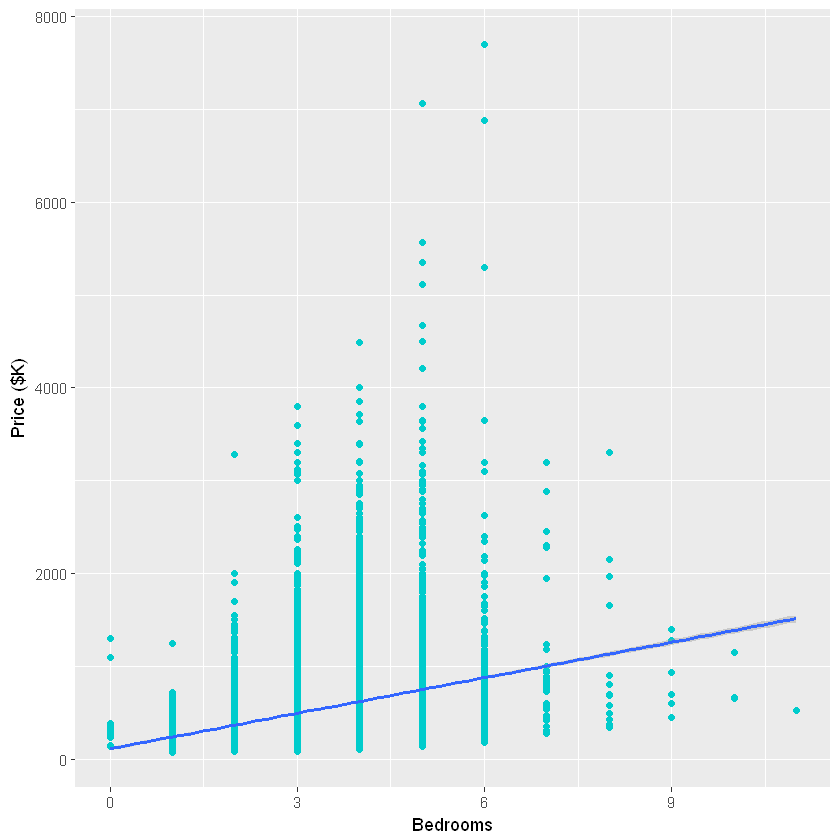

In [66]:
#Scatter plot to understand the relationship between Price and Bedrooms
library(ggplot2)
ggplot(House, aes(x=bedrooms,y=price/1000)) + xlab("Bedrooms") + ylab("Price ($K)") + geom_point(colour = "#00cccc") + geom_smooth(method=lm)

The plot indicates that as the number of bedrooms increase, the price also gets increased

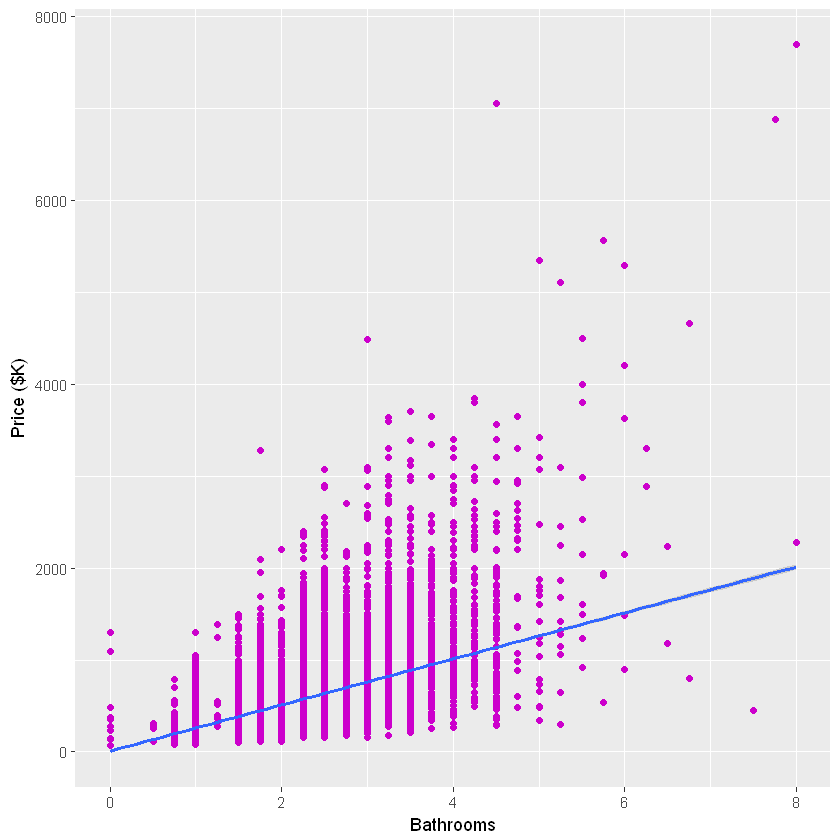

In [58]:
##Scatter plot to understand the relationship between Price and Bathrooms
ggplot(House, aes(x=bathrooms,y=price/1000)) + xlab("Bathrooms") + ylab("Price ($K)") + geom_point(colour="#cc00cc") + geom_smooth(method=lm)

As the number of bathrooms increase, the price gets increased

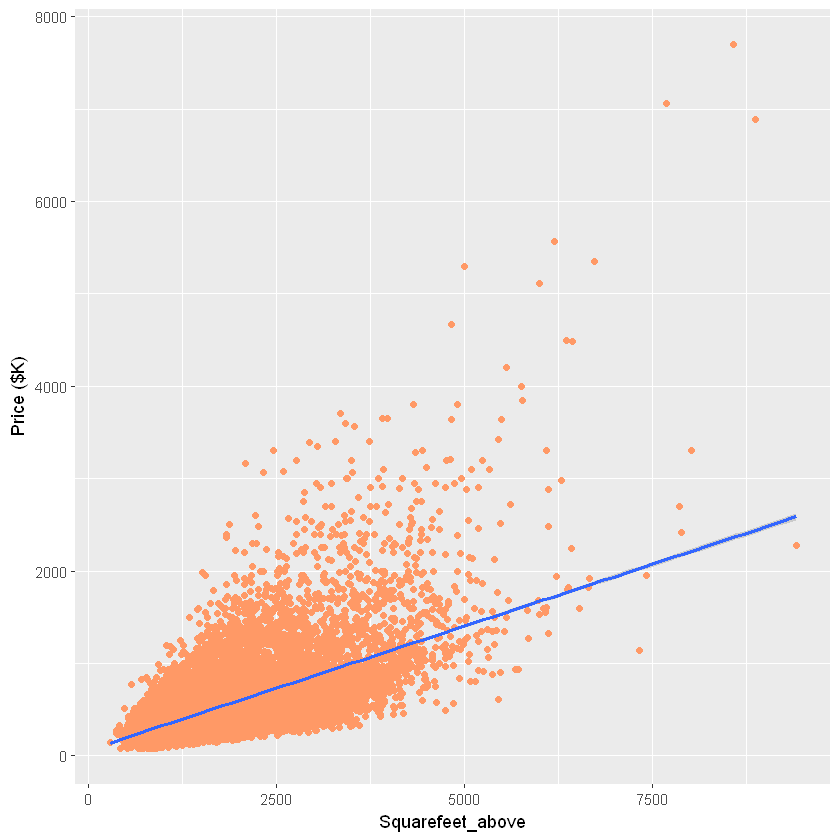

In [60]:
##Scatter plot to understand the relationship between Price and sqft_above
ggplot(House, aes(x=sqft_above,y=price/1000)) + xlab("Squarefeet_above") + ylab("Price ($K)") + geom_point(colour = "#ff9966") + geom_smooth(method=lm)


The more the squarefeet of all the floors, the more its price

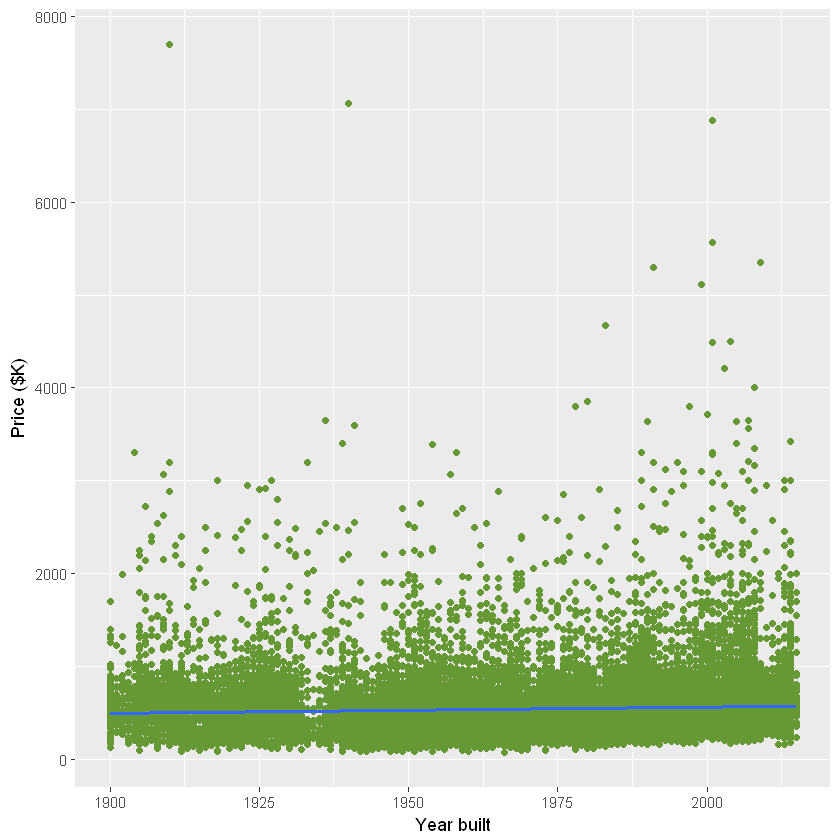

In [71]:
##Scatter plot to understand the relationship between Price and Yr_built
ggplot(House, aes(x=yr_built,y=price/1000)) + xlab("Year built") + ylab("Price ($K)") + geom_point(colour = "#669933") + geom_smooth(method=lm)


In [ ]:
The house built year does not have any impact on the price of the house

#### Hypothesis Testing:

The most common hypothesis test involves testing the null hypothesis of 

H0 : There is no relationship between price and sqft_living

versus the alternate hypothesis

H1 : There is some relationship between price and sqft_living

This corresponds to testing,

H0 : beta1 equal to 0 if there is no relationship
versus
H1 : beta1 notequal to 0 if there is some relationship



In [3]:
# Pearson correlation
House_test <- cor.test(x = House$sqft_living,y = House$price, method = "pearson")
House_test


	Pearson's product-moment correlation

data:  House$sqft_living and House$price
t = 144.92, df = 21611, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6952099 0.7087336
sample estimates:
      cor 
0.7020351 


The p-value indicates that price and sqft_living are satistically significant

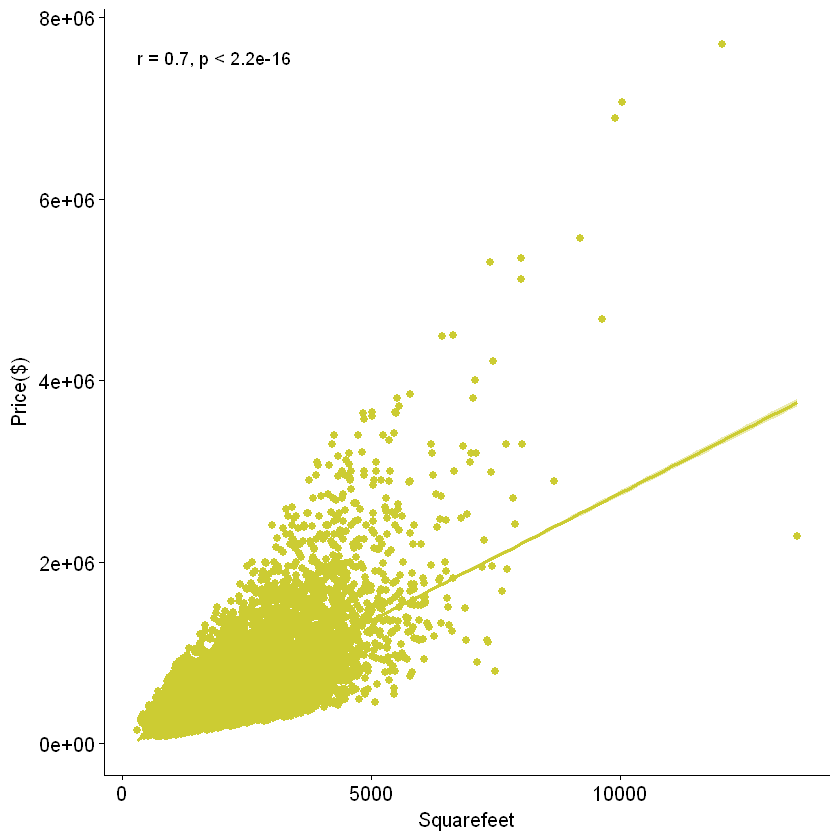

In [70]:
#Scatter plot to understand the relationship between sqft_living and price
library(ggpubr)
ggscatter(House, x = "sqft_living", y = "price", , color = "#cccc33",add = "reg.line",conf.int = TRUE, cor.coef = TRUE, cor.method = "pearson",
          xlab = "Squarefeet", ylab = "Price($)")

There is a clear linear association between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price. 

In [9]:
# Two sample t-test
t.test(House$sqft_living, House$price)


	Welch Two Sample t-test

data:  House$sqft_living and House$price
t = -215.44, df = 21612, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -542903.0 -533113.5
sample estimates:
mean of x mean of y 
   2079.9  540088.1 


p-value indicates price and sqft_living are satistically significant

In [20]:
# Power test
library(pwr)
sd(House$price) #standard deviation of price
sd(House$sqft_living)  #standard deviation of Sqft_living
pwr.t.test(n = NULL, d=2.07 ,power=.95,sig.level=.05,type="two.sample",alternative="two.sided")

[1] 367127.2

[1] 918.4409


     Two-sample t test power calculation 

              n = 7.18683
              d = 2.07
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


The calculation results indicate that we need 7 subjects for Price and 7 subjects for sqft_living in order the effect

#### Varying Sample sizes

In [19]:
#Sampling - 1000
dt <- sample(1:nrow(House), 1000)
dt_House <- House[dt, ]


In [21]:
#Pearson correlation for a sample of 1000
House_test1 <- cor.test(x = dt_House$sqft_living,y = dt_House$price, method = "pearson")
House_test1


	Pearson's product-moment correlation

data:  dt_House$sqft_living and dt_House$price
t = 30.842, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6653917 0.7289921
sample estimates:
     cor 
0.698569 


In [22]:
# Two sample t-test for a sample of 1000
t.test(dt_House$sqft_living, dt_House$price)


	Welch Two Sample t-test

data:  dt_House$sqft_living and dt_House$price
t = -48.57, df = 999.01, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -563103.3 -519368.5
sample estimates:
mean of x mean of y 
  2093.13 543329.04 


In [29]:
#Sampling - 100
dt_small <- sample(1:nrow(House), 100)
dt_House_small <- House[dt_small, ]

In [30]:
#Pearson correlation for a sample of 100
House_test2 <- cor.test(x = dt_House_small$sqft_living,y = dt_House_small$price, method = "pearson")
House_test2


	Pearson's product-moment correlation

data:  dt_House_small$sqft_living and dt_House_small$price
t = 9.2393, df = 98, p-value = 5.42e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5610869 0.7748797
sample estimates:
      cor 
0.6823093 


In [31]:
#Two sample t-test for a sample of 100
t.test(dt_House_small$sqft_living, dt_House_small$price)


	Welch Two Sample t-test

data:  dt_House_small$sqft_living and dt_House_small$price
t = -17.313, df = 99.002, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -581969.1 -462289.4
sample estimates:
mean of x mean of y 
  2129.61 524258.90 


In [26]:
#Sampling - 10000
dt_large <- sample(1:nrow(House), 10000)
dt_House_large <- House[dt, ]

In [27]:
#Pearson correlation for a sample of 10000
House_test3 <- cor.test(x = dt_House_large$sqft_living,y = dt_House_large$price, method = "pearson")
House_test3


	Pearson's product-moment correlation

data:  dt_House_large$sqft_living and dt_House_large$price
t = 30.842, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6653917 0.7289921
sample estimates:
     cor 
0.698569 


In [28]:
#One sample t-test for a sample of 10000
t.test(dt_House_large$sqft_living, dt_House_large$price)


	Welch Two Sample t-test

data:  dt_House_large$sqft_living and dt_House_large$price
t = -48.57, df = 999.01, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -563103.3 -519368.5
sample estimates:
mean of x mean of y 
  2093.13 543329.04 


In [34]:
#Sampling -10
dt_vsmall <- sample(1:nrow(House), 10)
dt_House_vsmall <- House[dt_vsmall, ]

In [35]:
##Pearson correlation for a sample of 10
House_test4 <- cor.test(x = dt_House_vsmall$sqft_living,y = dt_House_vsmall$price, method = "pearson")
House_test4


	Pearson's product-moment correlation

data:  dt_House_vsmall$sqft_living and dt_House_vsmall$price
t = 4.1848, df = 8, p-value = 0.00306
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4157649 0.9582582
sample estimates:
      cor 
0.8285074 


In [36]:
##Pearson correlation for a sample of 10 - repeated
House_test4 <- cor.test(x = dt_House_vsmall$sqft_living,y = dt_House_vsmall$price, method = "pearson")
House_test4


	Pearson's product-moment correlation

data:  dt_House_vsmall$sqft_living and dt_House_vsmall$price
t = 1.9968, df = 8, p-value = 0.08092
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08306026  0.88499262
sample estimates:
      cor 
0.5767271 


We could interpret that if the sample sizes are very small, there are chances for the p-value to be insignificant. It is better to have large samples.

In [25]:
#Permutation test
library(coin)
independence_test(price~ sqft_living,data = House)



	Asymptotic General Independence Test

data:  price by sqft_living
Z = 103.21, p-value < 2.2e-16
alternative hypothesis: two.sided


#### Conclusion:

1. The price of the house depends on number of bedrooms, number of bathrooms, squarefeet of the house, grade of the house and squarefeet excluding basement
2. The above mentioned are all positively correlated.Hence when these variables increase,the price also gets increased
3. Based on hypothesis testing, it concludes that there is a relationship between price and square feet of the house

#### Experience:
It was very interesting to do the t-test with different samples, so as to find how the sampling makes an impact on the p-values
